<a href="https://colab.research.google.com/github/riccardomarin/prog_algo_2022/blob/main/Intro_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scrivere codice può essere un buon modo per testare idee, trovare controesempi, o farsi un'idea se una certa proprietà può essere vera o meno (insomma, un buono strumento per studiare da soli a casa.

La libreria più classica di python per lavorare con i grafi è networkx
essa contiene molti algoritmi e strutture dati già pensate per lavorare
con i grafi.
Trovate qui alcuni tutorial base sul suo utilizzo: 
https://networkx.org/documentation/stable/tutorial.html

In [3]:
import networkx as nx
import numpy as np

Per creare un grafo, possiamo partire da una matrice di adiacenza.
Per esempio, se volessimo un grafo di 7 nodi, partiamo con una matrice 7x7 di zeri

In [4]:
A = np.zeros((7,7))
print(A)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


Ora popoliamo la matrice con gli archi che ci interessano, cioè mettiamo 1 dove gli archi sono presenti e 0 dove non lo sono.

In [5]:
A[0,1]=A[0,5]=A[0,6]=1
A[1,6]=A[1,2]=1
A[3,4]=A[3,2]=A[3,6]=1
A[4,5]=A[4,6]=1
A[6,2]=A[6,5]=1

print(A)

[[0. 1. 0. 0. 0. 1. 1.]
 [0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0.]]


Usando il metodo "nx.Graph(A)" possiamo creare una struttura dati con tutto quello che può servirci per lavorare sul grafo associato alla matrice A.

Nota: "nx.Graph(A)" crea un grafo non diretto.

In [6]:
G = nx.Graph(A)

Possiamo anche visualizzarlo facilmente, con il metodo "nx.draw(G)".
Alcuni argomenti utili della funzione:
- "with_labels=True" -> fa in modo che la visualizzazione scriva il numero sui nodi (più facile distinguerli)
- "font_weight='bold'" -> fa in modo che le scritte siano in grassetto (più leggibili)

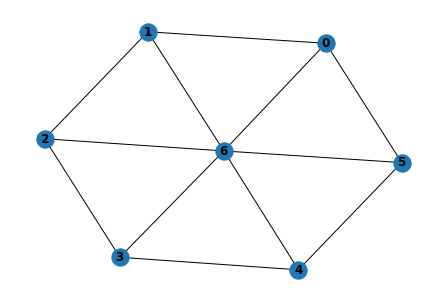

In [7]:
nx.draw(G,with_labels=True, font_weight='bold', )

Notate che anche se ho specificato solo alcuni archi, networkx non fa differenza, perché abbiamo specificato che il grafo è non diretto. 
Con "nx.DiGraph(A)" possiamo invece ottenere un grafo diretto, dove quindi saranno considerati solo i nodi effettivamente inseriti.

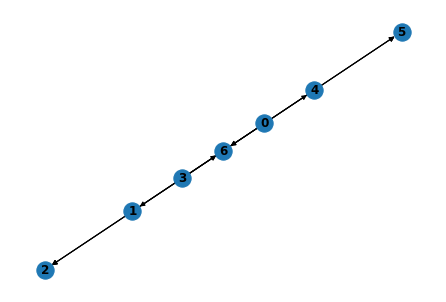

In [9]:
G = nx.DiGraph(A)

# Lo visualizzo con lo stesso comando di prima
nx.draw(G,with_labels=True, font_weight='bold', )

La disposizione dei nodi sul piano 2D è una scelta che la libreria risolve in autonomia; non stupiamoci se a volte non corrisponderà a quello che ci siamo disegnati sul foglio, perché ci sono molte visualizzazioni possibili. Ma possiamo impostarle noi a mano, oppure sfruttare altri layout disponibili. Ad esempio:

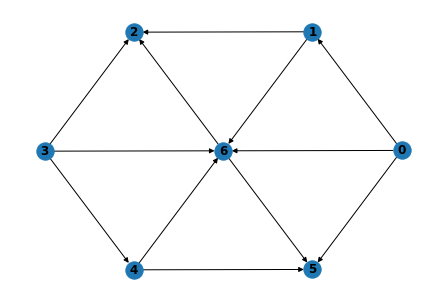

In [20]:
pos = nx.spectral_layout(G)

# Disegna il grafo specificando delle posizioni.
# NOTA: potete anche creare il vostro "pos" e posizionare i nodi
#       nel piano

nx.draw(G,with_labels=True, font_weight='bold',pos=pos )

Proviamo a fare una piccola demo per verificare l'algoritmo di bicolorazione visto a lezione:

In [24]:
# Algoritmo di bicolorazione: potete trovarlo sulle slide della lezione!
def colora(G):
  def DFSr(x,G,colori,c):
    colore[x]=c
    for y in G[x]:
      if colore[int(y)]==-1:
        DFSr(y,G,colore,1-c)
  colore = [-1 for v in G]
  DFSr(0, G, colore, 0)
  return colore 

Ora creiamo un grafo ciclo con un certo numero "k" di nodi. Il grafo ciclo dovrà connettere ogni nodo con il successivo, e poi alla fine l'ultimo nodo con il primo

Matrice di adiacenza:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]



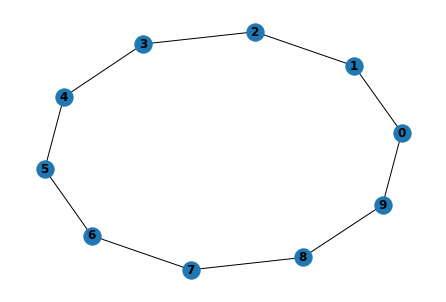

In [51]:
k = 10

# Inizializzo la matrice di adiacenza
A = np.zeros((k,k))

# Per ogni nodo, aggiungo l'arco in posizione +1 e quello in posizione -1
for i in range(len(A)-1):
  A[i,i+1]=1
  A[i,i-1]=1

# collego l'ultimo con il primo
A[len(A)-1,len(A)-2] = A[len(A)-1,0]=1

# Stampo la matrice di adiacenza
print(f"Matrice di adiacenza:\n{A}\n")

# Creo il grafo e lo visualizzo
G = nx.Graph(A)
nx.draw(G,with_labels=True, font_weight='bold')

Il nostro codice è pensato per lavorare con liste di adiacenza, e non lo abbiamo in nessun modo integrato con NetworkX. La cosa bella è che non ce ne dobbiamo preoccupare, la libreria è già pronta per poterci lavorare così!

In [52]:
# Lancio il mio algoritmo su G
colori = colora(G)
print(colori)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


Visualiziamo adesso la colorazione ottenuta

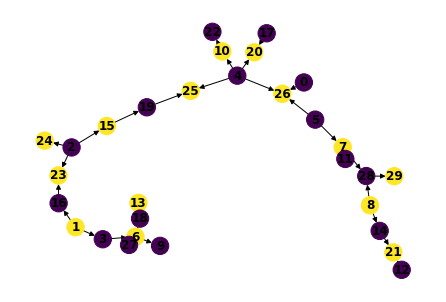

In [72]:
# ci basta aggiungere l'argomento "node_color", seguito da un vettore che contenga
# per ogni nodo un numero da usare per la colorazione. 

nx.draw(G, with_labels=True, font_weight='bold',  arrows=True, node_color=colori)

Proviamo a creare un caso più interessante: potremmo ad esempio provarlo sugli alberi:

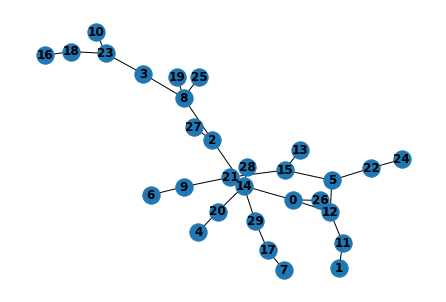

In [73]:
G = nx.random_tree(30)
nx.draw(G, with_labels=True, font_weight='bold')

Proviamo a bi-colorarlo:

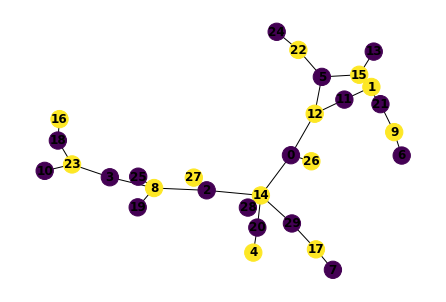

In [74]:
colori = colora(G)
nx.draw(G, with_labels=True, font_weight='bold',node_color=colori)

Qual è il tempo di esecuzione di questo algoritmo sugli alberi?

In [136]:
from time import time 

durate_tree = []

# Proviamo i grafi con nodi tra 2 e 300
for i in range(2,300):
  durata = 0

  # Visto che proveremo esempi a caso, faremo la media su 100 istanze
  for _ in range(100):
    G = nx.random_tree(i)
    start = time()
    # == START ==
    colori = colora(G)
    # == STOP ==
    durata = durata + (time() - start)

  # Salvo la media delle istanze 
  durate_tree.append(durata/100)

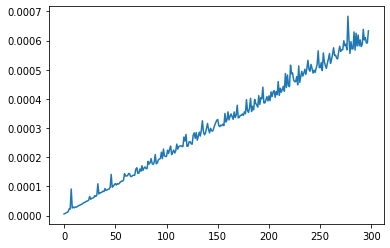

In [137]:
# Visualizzo la durata
import matplotlib.pyplot as plt 
plt.plot(durate_tree)

Proviamo ora con un grafo più interessante: creiamo un grafo che connette tutti i nodi pari con tutti i nodi dispari. Questo grafo ha per ogni vertice $n/2$ archi. Quindi in totale il grafo conterà  un numero di archi quadratico:

$|E| = n(\frac{n}{2}) = \frac{n^2}{2}$

Potete prendervi qualche minuto per convincervi che questa famiglia di grafi è bicolorabile.

Matrice di adiacenza:
[[0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0.]]



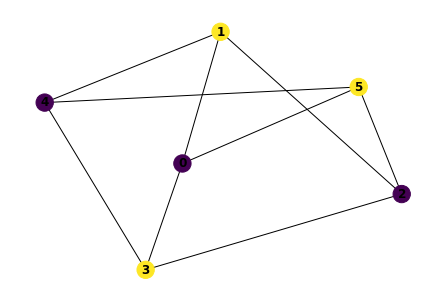

In [130]:
# Ad esempio, costruiamo un grafo di 6 nodi in questa maniera
i = 6
A = np.zeros((i,i))
A[1::2,::2] = 1
A[::2,1::2] = 1

# Stampo la matrice di adiacenza
print(f"Matrice di adiacenza:\n{A}\n")

# Creo il grafo, lo coloro e visualizzo
G = nx.Graph(A)
colori = colora(G)
nx.draw(G, with_labels=True, font_weight='bold',node_color=colori)

In [134]:
from time import time 

durate_dense = []
for i in range(2,300):
  # Creo il grafo (nota: in questo caso dato un numero di nodi esiste un unico
  # grafo, per cui ci limiteremo a misurare il tempo di una esecuzione)
  A = np.zeros((i,i))
  A[1::2,::2] = 1
  A[::2,1::2] = 1
  G = nx.Graph(A)
  start = time()
  ## START ##
  colori = colora(G)
  ## STOP ##
  durata = (time() - start)
  durate_dense.append(durata)


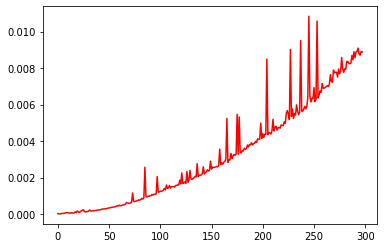

In [135]:
plt.plot(durate_dense,color='r')

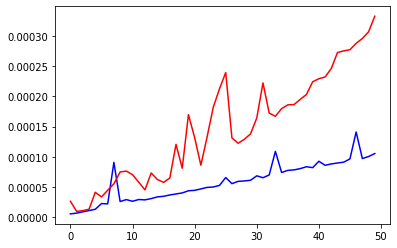

In [143]:
plt.plot(durate_tree[0:50], color='b')
plt.plot(durate_dense[0:50],color='r')